# Hyper-Parameter Selection using Polynomial Fitting

This script illustrates how to perform hyper-parameter selection for the degree of a polynomial fitting algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import fncs as fncs

### Polynomial Fitting

We load the data and use it for fitting the model.

Training Error = 0.0361
Test Error = 0.0574


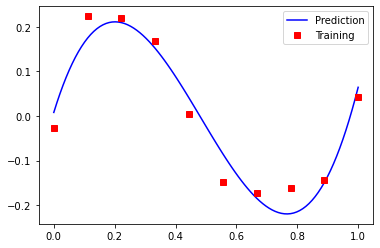

In [8]:
# Loading training, validation and test data
dfTrain = pandas.read_csv('Data_Train.csv')
dfVal = pandas.read_csv('Data_Val.csv')
dfTest = pandas.read_csv('Data_Test.csv')

############ TRAINING A MODEL

# Fitting model
deg = 3
X = fncs.create_X(dfTrain.x,deg)
beta = fncs.fit_beta(dfTrain,deg)

# Computing training error
yPredTrain = fncs.predict_y(dfTrain.x,beta)
err = fncs.rmse(dfTrain.y,yPredTrain)
print('Training Error = {:2.3}'.format(err))

# Computing test error
yPredTest = fncs.predict_y(dfTest.x,beta)
err = fncs.rmse(dfTest.y,yPredTest)
print('Test Error = {:2.3}'.format(err))

# Plotting fitted model
x = np.linspace(0,1,100)
y = fncs.predict_y(x,beta)
plt.plot(x,y,'b-',dfTrain.x,dfTrain.y,'rs')
plt.legend(['Prediction','Training'])
plt.show()

### Hyper-Parameter Tuning

We perform a search for the optimal degree of the polynomial fit. The training error should show a decreasing pattern. The validation error should decrease and then increase.

{'deg': [0, 1, 2, 3, 4, 5], 'errTrain': array([0.15092586, 0.12284395, 0.12098885, 0.03614516, 0.02023727,
       0.01944272]), 'errVal': array([0.15706622, 0.10063485, 0.10721   , 0.0654439 , 0.06952925,
       0.069375  ])}


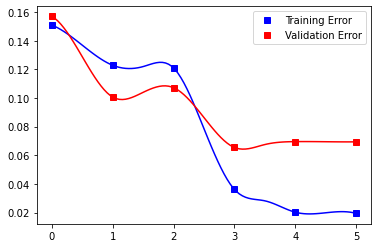

Optimal Degree = 3


In [18]:
# Computing error
maxDegree = 5
err = fncs.computeError(maxDegree,dfTrain,dfVal)

print(err)
# Plotting error
fncs.plotError(err)

# Selecting optimal degree
degOpt = err['deg'][np.argmin(err['errVal'])]
print('Optimal Degree = {:1}'.format(degOpt))

### Performance of Optimal Model

We demonstrate the performance of the model by comparing the error when training with only the training data, and with the training and validation data after the hyper-parameter has already been selected.

Test Error using only training data = 0.0574
Test Error using train. & val. data = 0.0508


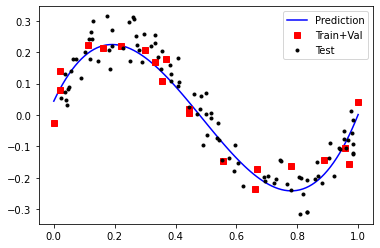

In [19]:
# Fitting model with training data only
beta = fncs.fit_beta(dfTrain,degOpt)
errTest = fncs.rmse(dfTest.y,fncs.predict_y(dfTest.x,beta))
print('Test Error using only training data = {:2.3}'.format(errTest))

# Fitting model with training and val data
df = pandas.concat([dfTrain, dfVal])
beta = fncs.fit_beta(df,degOpt)
errTest = fncs.rmse(dfTest.y,fncs.predict_y(dfTest.x,beta))
print('Test Error using train. & val. data = {:2.3}'.format(errTest))

# Plotting prediction
x = np.linspace(0,1,100)
y = fncs.predict_y(x,beta)
plt.plot(x,y,'b-',df.x,df.y,'rs',dfTest.x,dfTest.y,'k.')
plt.legend(['Prediction','Train+Val','Test'])
plt.show()